# Basics of Artificial Neural Networks <a></a>


![ANN](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

### Single-layer and Multi-layer perceptrons

多层感知器(Multi-Layer Perceptron，MLP)也叫人工神经网络(Artificial Neural Network，ANN)，除了输入输出层，它中间可以有多个隐层。最简单的MLP需要有一层隐层，即输入层、隐层和输出层才能称为一个简单的神经网络。习惯原因我之后会称为神经网络。通俗而言，神经网络是仿生物神经网络而来的一种技术，通过连接多个特征值，经过线性和非线性的组合，最终达到一个目标，这个目标可以是识别这个图片是不是一只猫，是不是一条狗或者属于哪个分布。

单层感知器(SLP)是基于阈值传递函数的前馈网络。SLP是最简单的人工神经网络类型，只能用二元目标(1,0)对线性可分的情况进行分类。

因为SLP是一个线性分类器如果情况不是线性可分的学习过程永远不会达到所有情况都被正确分类的点。感知器无法解决线性不可分问题的最著名的例子就是异或问题。


多层感知器(MLP)具有与单层感知器相同的结构，具有一个或多个隐藏层。反向传播算法包括两个阶段:激活的前进阶段传播从输入到输出层之间的误差和落后的阶段,观察到的实际和请求的标称值在输出层向后传播以修改重量和偏差值。

由此可知，神经网络主要有三个基本要素：权重、偏置和激活函数

权重：神经元之间的连接强度由权重表示，权重的大小表示可能性的大小

偏置：偏置的设置是为了正确分类样本，是模型中一个重要的参数，即保证通过输入算出的输出值不能随便激活。

激活函数：起非线性映射的作用，其可将神经元的输出幅度限制在一定范围内，一般限制在（-1~1）或（0~1）之间。最常用的激活函数是Sigmoid函数，其可将（-∞，+∞）的数映射到（0~1）的范围内。


# 关于本数据集

   iris包含150个样本，对应数据集的每行数据。每行数据包含每个样本的四个特征和样本的类别信息，所以iris数据集是一个150行5列的二维表。iris包含150个样本，对应数据集的每行数据。每行数据包含每个样本的四个特征和样本的类别信息，所以iris数据集是一个150行5列的二维表。


![dattaset](http://datahref.com/wp-content/uploads/2016/06/Iris_dataset_scatterplot.svg_.png)

<br>

![dattaset](https://media.geeksforgeeks.org/wp-content/uploads/20200330072328/photo-8.png)



# Perceptron


感知器是模拟人类神经元的基本功能。它接收𝑛输入，与树突输入的神经元相关联。由于倾斜，每个树突都被一个数字加权，这个数字表示它与神经元[1]的输入相关性。

The perceptron is a basic function that mimics the human neuron. It receives $n$ inputs, associated to the dendrites inputs to the neuron. Each dendrite, due to *lernging*, is weighted by a number that signals its input relevance for the neuron [1]. 

![Neuron](https://upload.wikimedia.org/wikipedia/commons/a/a9/Complete_neuron_cell_diagram_en.svg)


信号就这样被制造出来，并通过*轴突*传递给其他神经元[2];实际上，只有当精心设计的输入超过某个阈值时，神经元才会发出信号;这是一个尖峰神经元
The signal is thus elaborated and passed through the *axon* to others neurons [2]; actually, the neurons *fires* the signal only if the elaborated inputs have surpassed a certain threshold; this is a spiking neuron [3].


感知器想要模仿它。接收一个向量(即数组)$x_i$信号，其中$i$代表$i$-th树突，它用一个$w_i$向量对每个树突加权。它还增加了一个“偏差”来消除接近零的问题(偏差将决策边界从原点移开，并且不依赖于任何输入值)。

The perceptron wants to mimic it. Receinving a vector (i.e. array) $x_i$ of signals, where $i$ stands for the $i$-th dendrites, it weights each of them by a vector of weights $w_i$. It adds also a *bias* to remove near-zero issues (the bias shifts the decision boundary away from the origin and does not depend on any input value).

![Perceptron](https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

### Activation functions

激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活， 它们将输入信号转换为输出的可微运算。 大多数激活函数都是非线性的。

####  ReLU函数
最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU）， 因为它实现简单，同时在各种预测任务中表现良好。 ReLU提供了一种非常简单的非线性变换。 给定元素，ReLU函数被定义为该元素与的最大值：
$$\operatorname{ReLU}(x) = \max(x, 0).$$


通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。 为了直观感受一下，我们可以画出函数的曲线图。 正如从图中所看到，激活函数是分段线性的。

![5555](http://zh.d2l.ai/_images/output_mlp_76f463_21_0.svg)


当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。 注意，当输入值精确等于0时，ReLU函数不可导。 在此时，我们默认使用左侧的导数，即当输入为0时导数为0。 我们可以忽略这种情况，因为输入可能永远都不会是0。 这里引用一句古老的谚语，“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”， 这个观点正好适用于这里。 下面我们绘制ReLU函数的导数。


![666](http://zh.d2l.ai/_images/output_mlp_76f463_33_0.svg)

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。 这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题。

#### sigmoid函数

对于一个定义域在中的输入， sigmoid函数将输入变换为区间(0, 1)上的输出。 因此，sigmoid通常称为挤压函数（squashing function）： 它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

$$f (x) = \frac{1}{1+e^{-x}} \,,$$

在最早的神经网络中，科学家们感兴趣的是对“激发”或“不激发”的生物神经元进行建模。 因此，这一领域的先驱可以一直追溯到人工神经元的发明者麦卡洛克和皮茨，他们专注于阈值单元。 阈值单元在其输入低于某个阈值时取值0，当输入超过阈值时取值1。

当人们逐渐关注到到基于梯度的学习时， sigmoid函数是一个自然的选择，因为它是一个平滑的、可微的阈值单元近似。 当我们想要将输出视作二元分类问题的概率时， sigmoid仍然被广泛用作输出单元上的激活函数 （你可以将sigmoid视为softmax的特例）。 然而，sigmoid在隐藏层中已经较少使用， 它在大部分时候被更简单、更容易训练的ReLU所取代。 在后面关于循环神经网络的章节中，我们将描述利用sigmoid单元来控制时序信息流的架构。


当输入接近0时，sigmoid函数接近线性变换。


![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

sigmoid函数的导数为下面的公式：


$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$


![sigmoid2](http://zh.d2l.ai/_images/output_mlp_76f463_57_0.svg)


#### tanh函数

与sigmoid函数类似， tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上。 tanh函数的公式如下：
$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$
下面我们绘制tanh函数。 注意，当输入在0附近时，tanh函数接近线性变换。 函数的形状类似于sigmoid函数， 不同的是tanh函数关于坐标系原点中心对称。

![sigmoid2](https://zh.d2l.ai/_images/output_mlp_76f463_69_0.svg)

tanh函数的导数是：
$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。 当输入接近0时，tanh函数的导数接近最大值1。 与我们在sigmoid函数图像中看到的类似， 输入在任一方向上越远离0点，导数越接近0。

![sigmoid2](https://zh.d2l.ai/_images/output_mlp_76f463_81_0.svg#pic_center)



In [39]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

# Now we are ready to define the perceptron; 
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output
    

# Neural Network's Layer(s)

A standard Artificial Neural Network will be made of multiple layers:
1. An **Input Layer**, that pass the features to the NN
2. An arbitrary number of **Hidden Layers**, containing an arbitrary number of neurons for each layer, that receives the inputs and elaborate them. We will introduce Hidden Layers with ReLU activator, since in the *hidden* part of the NN we don't need the output to be contained in the $[0,1]$ range. 
3. An **Output Layer**: these layers contains a number of neurons equal to the number of possible labels we want to have a prediction to; this is because the output of the NN is thus a vector whose dimension is the same as the cardinality of the set of labels, and its entries are the *probability* for each label for the element whose feateures we have passed to the NN. This means that we will use a sigmoid activator to the Output layer, so we squeeze each perceptron's output between 0 and 1. 

**输出层**:这些层包含的神经元数量等于我们想要预测的可能标签的数量;这是因为神经网络的输出是一个向量，它的维数与标签集的基数相同，它的值是我们已经传递给神经网络的元素的每个标签的*概率*。在Output层使用sigmoid激活器，我们将每个感知器的输出压缩到0和1之间。


![ANN](https://miro.medium.com/proxy/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg#pic_center)

在本实验中，我们有3种花的分类;输出层有三个节点，选择每行最大的值作为该类的标签，赋值为1，其余的赋值为0


## Backpropagation and Gradien Descent

BP网络的结构降法的基础上。BP网络的输入输出关系实质上是一种映射关系：一个 输入m输出的BP神经网络所完成的功能是从 一维欧氏空间向m维欧氏空间中一有限域的连续映射，这一映射具有高度非线性。它的信息处理能力来源于简单非线性函数的多次复合，因此具有很强的函数复现能力。这是BP算法得以应用的基础。

反向传播算法主要由两个环节(激励传播、权重更新)反复循环迭代，直到网络的对输入的响应达到预定的目标范围为止。

BP算法的学习过程由正向传播过程和反向传播过程组成。在正向传播过程中，输入信息通过输入层经隐含层，逐层处理并传向输出层。如果在输出层得不到期望的输出值，则取输出与期望的误差的平方和作为目标函数，转入反向传播，逐层求出目标函数对各神经元权值的偏导数，构成目标函数对权值向量的梯量，作为修改权值的依据，网络的学习在权值修改过程中完成。误差达到所期望值时，网络学习结束。


通过计算梯度使代价函数最小化，得到局部极小值。在每个迭代或训练步骤中，网络中的权重通过计算的梯度以及 learning rate 进行更新，该梯度控制对权重值的修改因子。在神经网络的训练阶段，每个步骤都要重复这个过程。理想情况下，目标是在每一步之后更接近局部最小值。







为了调整训练参数 $\{w\}$ and $\{b\}$, 我们需要实现“反向传播”. 我们要最小化某个**成本函数**
$$\mu(y,\bar{y})=|y-\bar{y}|^2$$
$y$是输出层的输出，而$\bar{y}$是实际的标签; 为了做到这一点，我们开始*梯度下降*, 这意味着我们把成本函数看作是可训练参数的函数 $\mathbf{w}$ 像 $\{w\}$ 和 $\{b\}$, 我们计算梯度 - 梯度，可以看作是多维图的斜率 [3] - 从随机初始化的集合中减去它
$$\mathbf{w}'_n =  \mathbf{w}_n - \eta \nabla \mu(\mathbf{w}_n)  \,,$$
向代价函数的最优值，或全局最小值移动。 上式中 $\eta$ 是神经网络的学习率 [4] 


如下图所示 [5]:

![GD](https://hackernoon.com/hn-images/1*f9a162GhpMbiTVTAua_lLQ.png#pic_center)






### 回顾

We now recap what we have shown: 
* **Input**: 设置输入 $z_0^{i_0}$;
* **Feed Forward**: 计算$\alpha$-th 层 $z_\alpha^{i_\alpha}$ 
$$z_\alpha^{i_\alpha} = \varphi ( w_{\alpha}^{i_{\alpha} i_{\alpha-1}} \, z^{i_{\alpha-1}}_{\alpha-1} + b_\alpha^{i_\alpha} ) \equiv \varphi (\zeta^{i_\alpha}_\alpha) ,$$
直到输出层, 利用的公式为
$$y = f( w_{Out}^{i_n} z_n^{i_n} + b_{Out} ) .$$
* **计算偏差**: 通过公式计算最后一层的误差
$$\delta^N_{i_N} = \frac{\partial \mu}{\partial z_N^{i_N} } \,.$$
最后一层实际上是输出层，所以
$$\delta^{Out} = \frac{\partial \mu}{\partial z_{Out} } \cdot f' (z_{Out}) .$$
*  **Backpropagate the Error**: 对每一层 $\alpha= N-1, \ldots, 2$ 计算 
$$\delta_{\alpha}^{i_\alpha}  = {\large \Sigma}_{{i_\alpha}}  \delta_{\alpha+1}^{i_\alpha+1}  \, w_{\alpha}^{i_{\alpha+1} i_\alpha} \, \varphi' (z_{\alpha}^{i_\alpha}) \,.$$
* **Output**: 损失函数的梯度计算

$$\frac{\partial \mu}{\partial w_\alpha^{i_{\alpha+1} i_\alpha} } = \delta_\alpha^{i_\alpha} \cdot z_{\alpha-1}^{i_\alpha-1} \varphi'(\zeta_\alpha^{i_\alpha} ) ,$$
$$\frac{\partial \mu}{\partial b_\alpha^{i_{\alpha}} } =  \delta_\alpha^{i_\alpha} \cdot  \varphi'(\zeta_\alpha^{i_\alpha} ) . $$

激活函数的显式导数是已知的，很容易计算，因为
$$f'(x) = f(x)(1-f(x)) = y(1-y) \,,$$






## 三层网络
 
将初始化一个人工神经网络

1. An **输入层** 输入的是4列dataframe  4个神经元

2. **隐藏层** 4个神经元

3. 因为我们要对三种花色进行分类，所以输出层为3个节点（神经元）



我们将会进行如下操作

0. 对数据集进行 train/test split  接下来分别用批量梯度下降和随机梯度下降来确定batch值

1. 输入训练数据$\{x_i\}_I$，并将其送入第一层;
2. 对每行数据
    1. **前馈**: 
    $$z_1^j = \varphi( {\large \Sigma}_{i=0,1} \, w_1^{j i} x^i + b_1^j ), $$
    $$z_2^k = \varphi( {\large \Sigma}_{j=0,\ldots, p-1} \, w_2^{k j} z_1^j + b_2^k ), $$
    $$y = f( {\large \Sigma}_{k=0, \ldots, q-1} w_{Out}^k z_2^k + b_{Out} ) .$$
    2.  **误差计算**: 
    $$\delta_{Out} = \frac{\partial \mu}{\partial y} \cdot f' (y) = 2(y-\bar{y}) \cdot y(1-y) $$
    3. **反向传播**: 
    $$\delta_2^{k} =   \delta_{Out}  \, w_{Out}^{k} \, \varphi' (z_{2}^{k}) ,$$
    $$\delta_1^j = {\large \Sigma}_{k=0, \ldots, q-1} \delta_2^{k} w_2^{k j}  \, \varphi' (z_{1}^{j}) . $$
    
    
3. **梯度下降**: 当我们从训练集中的$I$传递到$(I+1)$时，我们需要按照规则顺序更新权重*
    * 输出层:
    $${}^{(I+1)}w_{Out}^k = {}^{(I)} w_{Out}^k - \eta {}^{(I)}\delta_{Out} \, z_2^k \,,$$
    $${}^{(I+1)}b_{Out} = {}^{(I)} b_{Out} - \eta {}^{(I)}\delta_{Out}\,,$$
    * 1层:
    $${}^{(I+1)}w_{1}^{ji} = {}^{(I)} w_{1}^{ji} - \eta \delta_1^{j} \, x_i^{i} \,,$$
    $${}^{(I+1)}b_{1} = {}^{(I)} b_{1}^j - \eta \delta_2^{j} \,, $$

遍历整个集合，这样我们就可以“训练”我们的神经网络!


In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
print('Tensorflow/Keras: %s' % keras.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Tensorflow/Keras: 2.6.0
sklearn: 1.0.2
plotly: 5.7.0
/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


加载数据集

In [119]:
df = pd.read_csv('../input/iris/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


对数据集进行修改，增加3个标志位 ***flag1***，***flag2***，***flag3***，品种为Iris-setosa的花flag1位值为1，若某花不属于Iris-setosa品种，flag1位置为0，flag2，flag3同理。

In [120]:
df["flag1"] = df["Species"].apply(lambda x: 1 if x=="Iris-setosa" else 0)
df["flag2"] = df["Species"].apply(lambda x: 1 if x=="Iris-versicolor" else 0)
df["flag3"] = df["Species"].apply(lambda x: 1 if x=="Iris-virginica" else 0)



# 试试这种方法
# # We define a dictionary to binarize the sex
# dict_sex = {
#     'male' : 0,
#     'female' : 1
# }

# # We apply the dictionary using a lambda function and the pandas .apply() module
# data['Bsex'] = data['Sex'].apply(lambda x : dict_sex[x])

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flag1,flag2,flag3
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [121]:
X=df.iloc[:,1:5]
y=df.iloc[:,6:9]
# y=df['flag'].values
X,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
      flag1  flag2  flag3
 0        1      0      0
 1        1      0      0
 2        1      0      0
 3        1      0      0
 4        1      0      0
 ..     ...    ...    ...
 145      0      0      1
 146     

将数据集划分为训练集和测试集

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 下面我们先用TensorFlow中的函数进行实验，并对***随机梯度下降和批量梯度下降***的区别进行探索

## **在后面我会从0开始，手写完成一个前馈网络。**

#### 输入层，数据维度为4，分别为 **SepalLengthCm, SepalWidthCm,	PetalLengthCm,	PetalWidthCm**
#### 隐藏层，我们指定神经元的个数也为4，采用**softplus激活函数**
#### 隐藏层，神经元的个数也为3，因为我们需要3列输出结果，采用**sigmoid激活函数**

In [123]:
# Specify the structure of a Neural Network
model = Sequential(name="Model_Input") # Model
model.add(Input(shape=(4,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(4, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(3, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))


#### 关于Softplus函数
> Softplus函数可以看作是ReLU函数的平滑。根据神经科学家的相关研究，Softplus函数和ReLU函数与脑神经元激活频率函数有神似的地方。也就是说，相比于早期的激活函数，Softplus函数和ReLU函数更加接近脑神经元的激活模型，而神经网络正是基于脑神经科学发展而来，这两个激活函数的应用促成了神经网络研究的新浪潮。


<br>
<br>



$$Softplus(x)=log(1+e 
x)$$

<br>




![5454](https://img-blog.csdnimg.cn/c74c5ede6eca45bebe85f4aa32f676c6.png?x-oss-process=image/watermark,type_ZHJvaWRzYW5zZmFsbGJhY2s,shadow_50,text_Q1NETiBAdm9uICBOZXVtYW5u,size_20,color_FFFFFF,t_70,g_se,x_16)


#### 实例化一个模型，使用Adam优化器，我们要解决的是多标签分类问题，所以损失函数使用binary_crossentropy，评价标准使用'Accuracy', 'Precision', 'Recall'值

In [124]:
# Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

# or loss = Sigmoid Cross-Entropy

In [83]:
X_train,y_train

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 137            6.4           3.1            5.5           1.8
 84             5.4           3.0            4.5           1.5
 27             5.2           3.5            1.5           0.2
 127            6.1           3.0            4.9           1.8
 132            6.4           2.8            5.6           2.2
 ..             ...           ...            ...           ...
 9              4.9           3.1            1.5           0.1
 103            6.3           2.9            5.6           1.8
 67             5.8           2.7            4.1           1.0
 117            7.7           3.8            6.7           2.2
 47             4.6           3.2            1.4           0.2
 
 [120 rows x 4 columns],
      flag1  flag2  flag3
 137      0      0      1
 84       0      1      0
 27       1      0      0
 127      0      0      1
 132      0      0      1
 ..     ...    ...    ...
 9        1      0      0
 103     

我们先使用随机梯度下降，即batch_size设定为1，500回合

In [ ]:
##### Step 5 - Fit keras model on the dataset
history = model.fit(X_train, # input data
          y_train, # target data
          batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )

dict_keys(['loss', 'Accuracy', 'precision', 'recall', 'val_loss', 'val_Accuracy', 'val_precision', 'val_recall'])


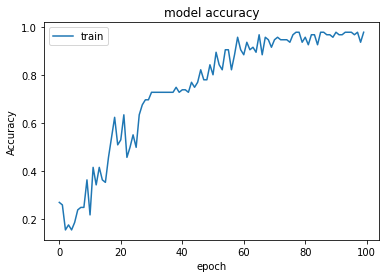

In [126]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

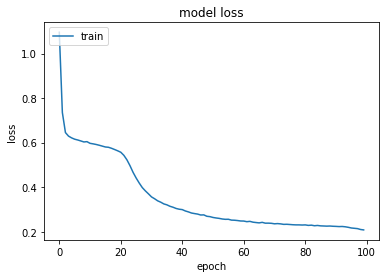

In [127]:
# summarize history for accuracy
plt.plot(history.history['loss'])
# plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

查看模型的训练情况

In [49]:
asss = model.predict(X_train)
df_result = pd.DataFrame(asss)

In [50]:
df_result

,0,1,2
0,1.850245e-23,0.091129,9.637907e-01
1,6.447108e-16,0.636823,1.939721e-01
2,1.000000e+00,0.006960,1.264638e-09
3,1.756390e-20,0.220431,8.072318e-01
4,7.085414e-30,0.001435,9.998868e-01
...,...,...,...
115,1.000000e+00,0.019457,4.322121e-09
116,2.795625e-25,0.029230,9.936743e-01
117,1.738929e-09,0.980537,6.096363e-04
118,5.247947e-30,0.011910,9.983138e-01


#### 对输出结果进行处理，output共3列，我们选取值最大的那一列作为该数据所属的分类，将值置为1，其余两列值置为0

In [51]:
for x in range(120):
    df_result.loc[x,df_result[x:x+1].idxmax(axis="columns")]=1
    
df_result = (df_result == 1.0).astype(int)
df_result,y_train

(     0  1  2
 0    0  0  1
 1    0  1  0
 2    1  0  0
 3    0  0  1
 4    0  0  1
 ..  .. .. ..
 115  1  0  0
 116  0  0  1
 117  0  1  0
 118  0  0  1
 119  1  0  0
 
 [120 rows x 3 columns],
      flag1  flag2  flag3
 137      0      0      1
 84       0      1      0
 27       1      0      0
 127      0      0      1
 132      0      0      1
 ..     ...    ...    ...
 9        1      0      0
 103      0      0      1
 67       0      1      0
 117      0      0      1
 47       1      0      0
 
 [120 rows x 3 columns])

可以看出，在训练集上进行测试，准确率极高，模型效果很好

In [52]:
print(classification_report(y_train, df_result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.89      0.94        37
           2       0.92      1.00      0.96        44

   micro avg       0.97      0.97      0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120
 samples avg       0.97      0.97      0.97       120



In [53]:
model.summary() 

Model: "Model_Input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer (Dense)         (None, 4)                 20        
_________________________________________________________________
Output-Layer (Dense)         (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


#### 下面我们对测试集进行预测

In [54]:
attt = model.predict(X_test)
kkkk = pd.DataFrame(attt)

for y in range(30):
    kkkk.loc[y,kkkk[y:y+1].idxmax(axis="columns")]=1
    
kkkk = (kkkk == 1).astype(int)
kkkk,y_test

print(classification_report(y_test, kkkk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



在测试集上模型表现极佳，准确率甚至可达100%

### 接下来我们进行**批量梯度下降**batch_size设置为样本总数120，测试结果

In [ ]:
##### Step 5 - Fit keras model on the dataset
history=model.fit(X_train, # input data
          y_train, # target data
          batch_size=120, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=500, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
#           validation_split=0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )




dict_keys(['loss', 'Accuracy', 'precision', 'recall'])


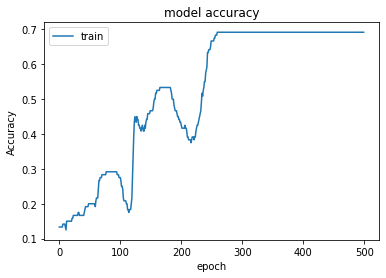

In [116]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

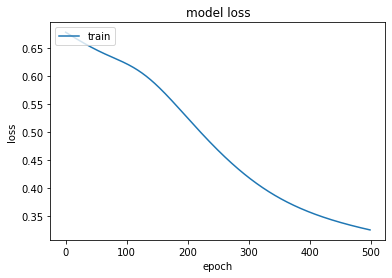

In [117]:
# summarize history for accuracy
plt.plot(history.history['loss'])
# plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
asss = model.predict(X_train)
df_result = pd.DataFrame(asss)

In [90]:
for x in range(120):
    df_result.loc[x,df_result[x:x+1].idxmax(axis="columns")]=1
    
df_result = (df_result == 1.0).astype(int)
df_result,y_train

(     0  1  2
 0    0  0  1
 1    0  1  0
 2    1  0  0
 3    0  0  1
 4    0  0  1
 ..  .. .. ..
 115  1  0  0
 116  0  0  1
 117  0  1  0
 118  0  0  1
 119  1  0  0
 
 [120 rows x 3 columns],
      flag1  flag2  flag3
 137      0      0      1
 84       0      1      0
 27       1      0      0
 127      0      0      1
 132      0      0      1
 ..     ...    ...    ...
 9        1      0      0
 103      0      0      1
 67       0      1      0
 117      0      0      1
 47       1      0      0
 
 [120 rows x 3 columns])

In [91]:
print(classification_report(y_train, df_result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        44

   micro avg       0.97      0.97      0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120
 samples avg       0.97      0.97      0.97       120



可以发现，使用此种方法准确度也极高，与上种方法不分伯仲

# **总结**

### 随机梯度下降和


### 下面我们手工实现一个前馈网络

In [ ]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.

    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
    
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, wOut, bOut, mu

In [ ]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);